In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [33]:
df = pd.read_csv('../DATA/penguins_size.csv')

## Drop

In [34]:
df = df.dropna()

In [35]:
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE


## Get features and encode categorical labels

In [36]:
X = pd.get_dummies(df.drop('species', axis=1), drop_first=True)

In [37]:
y = df['species']

In [38]:
from sklearn.model_selection import train_test_split

In [39]:
X_train, X_test ,y_train, y_test = train_test_split(X, y , test_size=0.3, random_state=101)

## Random Forest Classifier

In [40]:
from sklearn.ensemble import RandomForestClassifier

In [41]:
rfc = RandomForestClassifier(n_estimators=10,max_features='auto',random_state=101)
'''
n_estimators : number of decision tree
max_features : number of features. could be int, float, string, None
random_state : randomness mode for setting up the decision trees for particular split 
'''

'\nn_estimators : number of decision tree\nmax_features : number of features. could be int, float, string, None\nrandom_state : randomness mode for setting up the decision trees for particular split \n'

## Fit the model

In [42]:
rfc.fit(X_train, y_train)

RandomForestClassifier(n_estimators=10, random_state=101)

In [43]:
preds = rfc.predict(X_test)

## Accuracy

In [45]:
from sklearn.metrics import classification_report, plot_confusion_matrix

C:\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


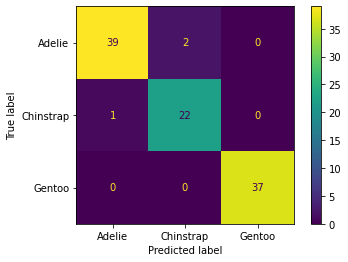

In [46]:
plot_confusion_matrix(rfc, X_test, y_test)

In [47]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

      Adelie       0.97      0.95      0.96        41
   Chinstrap       0.92      0.96      0.94        23
      Gentoo       1.00      1.00      1.00        37

    accuracy                           0.97       101
   macro avg       0.96      0.97      0.97       101
weighted avg       0.97      0.97      0.97       101



In [48]:
from sklearn.linear_model import LogisticRegression

In [49]:
log_model = LogisticRegression()

In [50]:
log_model.fit(X_train, y_train)

C:\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [51]:
preds = log_model.predict(X_test)

In [53]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

      Adelie       0.95      0.98      0.96        41
   Chinstrap       0.95      0.91      0.93        23
      Gentoo       1.00      1.00      1.00        37

    accuracy                           0.97       101
   macro avg       0.97      0.96      0.97       101
weighted avg       0.97      0.97      0.97       101



In [54]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC


In [55]:
svc = SVC()


In [56]:
voting_clf = VotingClassifier(
    estimators=[('log', log_model), ('rf', rfc), ('svc', svc)],
    voting='hard')

voting_clf.fit(X_train, y_train)

C:\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


VotingClassifier(estimators=[('log', LogisticRegression()),
                             ('rf',
                              RandomForestClassifier(n_estimators=10,
                                                     random_state=101)),
                             ('svc', SVC())])

In [57]:
voting_clf.fit(X_train, y_train)

C:\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


VotingClassifier(estimators=[('log', LogisticRegression()),
                             ('rf',
                              RandomForestClassifier(n_estimators=10,
                                                     random_state=101)),
                             ('svc', SVC())])

In [59]:
preds = voting_clf.predict(X_test)

In [60]:
preds[:3], y_test[:3]

(array(['Chinstrap', 'Gentoo', 'Adelie'], dtype=object),
 202    Chinstrap
 315       Gentoo
 141       Adelie
 Name: species, dtype: object)

C:\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


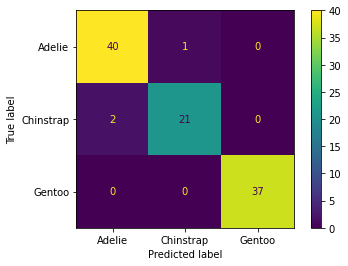

In [61]:
plot_confusion_matrix(voting_clf, X_test, y_test)